# Trabajo Practico N1

## 1. Regresión Lineal

## Participantes:
- **Alexis Aramis Torchinsky**

In [57]:
import pandas as pd
import numpy as np
locPath=!pwd
locPath=locPath[0]

## training data
fnData=locPath+'/datos1_entrenamiento.csv'
## 1.2 Load training CSV
dataCsv  = pd.read_csv(fnData, encoding = "ISO-8859-1")
## This represents the population and the earnings in each city
population = np.array([x for x in dataCsv.x])
population = population.reshape(len(population),1)
earnings = np.array([y for y in dataCsv.y])
earnings = earnings.reshape(len(earnings),1)
print(population)
print(earnings)

## 1.3 Load validation data
fnValidationData=locPath+'/datos1_validacion.csv'
## Open the training CSV
validationDataCsv  = pd.read_csv(fnValidationData, encoding = "ISO-8859-1")
## This represents the population and the earnings in each city
populationVal = np.array([x for x in validationDataCsv.x])
populationVal = populationVal.reshape(len(populationVal),1)
earningsVal = np.array([y for y in validationDataCsv.y])
earningsVal = earningsVal.reshape(len(earningsVal),1)
print(populationVal)
print(earningsVal)


[[ 8.3829]
 [ 5.7292]
 [ 5.0546]
 [ 5.2524]
 [ 5.0594]
 [11.708 ]
 [22.203 ]
 [18.945 ]
 [ 5.4069]
 [ 6.3261]
 [ 5.6397]
 [ 6.1101]
 [ 5.5416]
 [ 7.0708]
 [ 8.2111]
 [ 5.5649]
 [10.957 ]
 [ 8.0959]
 [ 8.4084]
 [ 6.5159]
 [ 6.4296]
 [ 5.8707]
 [ 5.6407]
 [ 9.7687]
 [13.394 ]
 [ 5.5277]
 [ 5.8918]
 [18.959 ]
 [ 7.5386]
 [ 5.4994]
 [ 7.9334]
 [ 6.3589]
 [ 5.7077]
 [ 5.1884]
 [10.136 ]
 [ 5.7107]
 [ 7.5402]
 [ 6.8825]
 [ 5.1793]
 [ 6.0062]
 [ 7.8247]
 [ 7.6366]
 [ 6.3654]
 [ 5.8014]
 [12.828 ]
 [ 7.2259]
 [ 5.7737]
 [ 5.6063]
 [10.236 ]
 [ 7.2182]
 [ 6.5894]
 [ 6.002 ]
 [ 6.3328]
 [20.341 ]
 [ 5.1301]
 [ 9.1802]
 [ 6.3534]
 [ 9.4536]
 [ 5.5204]
 [ 6.3557]
 [ 5.3794]
 [ 5.8598]
 [ 5.0269]
 [14.164 ]
 [ 8.5172]
 [ 7.6031]
 [ 5.3054]
 [ 8.5186]
 [ 5.734 ]
 [ 9.3102]
 [ 5.4369]
 [10.274 ]
 [21.279 ]
 [ 7.3345]
 [20.27  ]
 [ 6.4862]
 [ 9.2482]]
[[11.886 ]
 [ 0.4795]
 [ 3.8166]
 [-1.22  ]
 [ 2.8214]
 [ 5.3854]
 [24.147 ]
 [22.638 ]
 [ 0.5566]
 [ 5.1875]
 [ 4.6042]
 [17.592 ]
 [ 1.0179]
 [ 5.3893

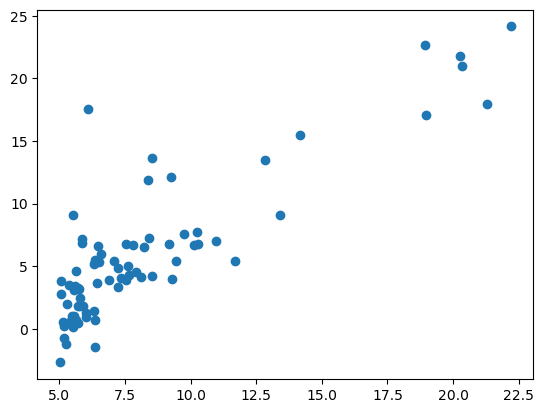

In [58]:
# 1.4 Graph x-y dispersion for training data
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(population,earnings)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

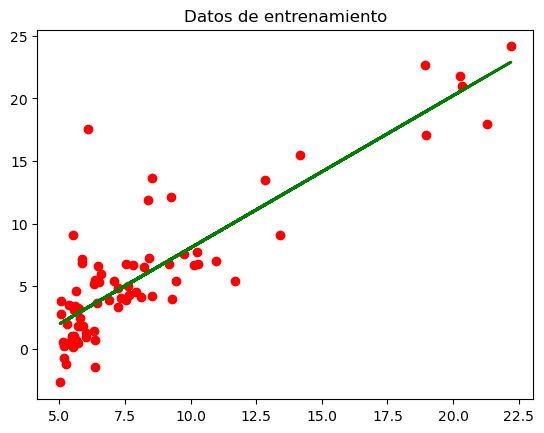

In [59]:
# 1.5 Adjust the linear model
from sklearn import linear_model

# Creamos un objeto de regresión lineal
linear_regressor = linear_model.LinearRegression()     

# Ajustamos la regresión a los datos de entrenamiento
linear_regressor.fit(population,earnings)

# Y a partir de datos de regresión encontrados
training_linear_predict = linear_regressor.predict(population)
# 1.6 - Graph x-y dispersion for training plus the linear regresion
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(population,earnings, color='red')
plt.plot(population, training_linear_predict, color='green', linewidth=2)
plt.title('Datos de entrenamiento')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

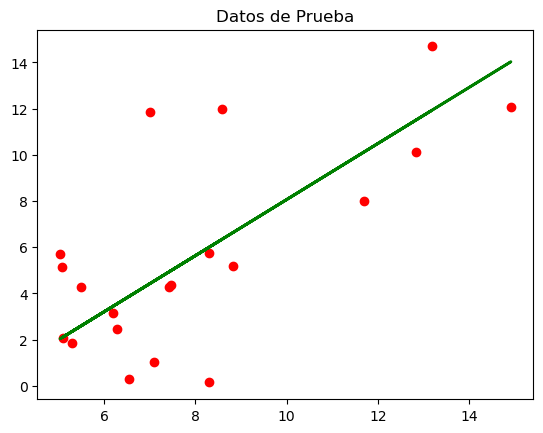

In [60]:
# 1.7 - predict and graph validation data
# Y a partir de datos de regresión encontrados
test_linear_predict = linear_regressor.predict(populationVal)

plt.figure()
plt.scatter(populationVal,earningsVal, color='red')
plt.plot(populationVal, test_linear_predict, color='green', linewidth=2)
plt.title('Datos de Prueba')
plt.show

In [61]:
# 1.8 Model Metrics Calculus
import sklearn.metrics as sm
print("Error absoluto medio =", round(sm.mean_absolute_error(earningsVal, test_linear_predict), 2)) 
print("Error cuadratico medio =", round(sm.mean_squared_error(earningsVal, test_linear_predict), 2)) 
print("Error absoluto mediano =", round(sm.median_absolute_error(earningsVal, test_linear_predict), 2)) 
print("Puntuación de varianza explicada =", round(sm.explained_variance_score(earningsVal, test_linear_predict), 2)) 
print("Puntuación R2 =", round(sm.r2_score(earningsVal, test_linear_predict), 2))

Error absoluto medio = 2.38
Error cuadratico medio = 9.73
Error absoluto mediano = 1.83
Puntuación de varianza explicada = 0.45
Puntuación R2 = 0.45


Error absoluto medio = 2.32
Error cuadratico medio = 9.41
Error absoluto mediano = 1.4
Puntuación de varianza explicada = 0.47
Puntuación R2 = 0.47


<function matplotlib.pyplot.show(close=None, block=None)>

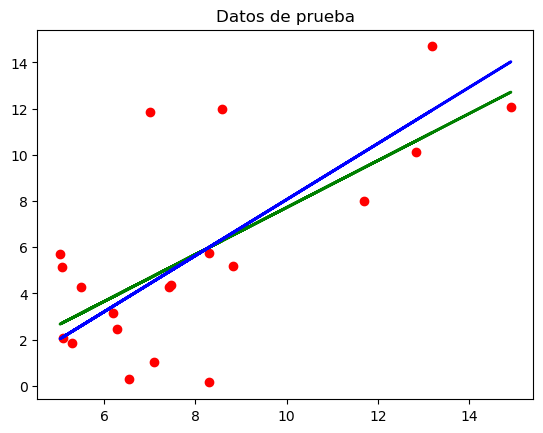

In [96]:
# 1.9 - Ridge regresion module
regresion_ridge = linear_model.Ridge(alpha=0.01, fit_intercept=True, max_iter=10000)
regresion_ridge.fit(populationVal, earningsVal)

ridge_test_linear_predict = regresion_ridge.predict(populationVal)

# 1.10 Ridge regresion Model Metrics Calculus
print("Error absoluto medio =", round(sm.mean_absolute_error(earningsVal, ridge_test_linear_predict), 2)) 
print("Error cuadratico medio =", round(sm.mean_squared_error(earningsVal, ridge_test_linear_predict), 2)) 
print("Error absoluto mediano =", round(sm.median_absolute_error(earningsVal, ridge_test_linear_predict), 2)) 
print("Puntuación de varianza explicada =", round(sm.explained_variance_score(earningsVal, ridge_test_linear_predict), 2)) 
print("Puntuación R2 =", round(sm.r2_score(earningsVal, ridge_test_linear_predict), 2))

plt.figure()
plt.scatter(populationVal, earningsVal, color='red')
plt.plot(populationVal, ridge_test_linear_predict, color='green', linewidth=2)
plt.plot(populationVal, test_linear_predict, color='blue', linewidth=2)
#plt.plot(population, training_linear_predict, color='lightblue', linewidth=2)
plt.title('Datos de prueba')
plt.show

# Análisis
- Para regresion lineal standard
  - Error absoluto medio = 2.38
  - Error cuadratico medio = 9.73
  - Error absoluto mediano = 1.83
  - Puntuación de varianza explicada = 0.45
  - Puntuación R2 = 0.45
- Para Ridge (alpha=0.01, fit_intercept=True, max_iter=100000)
  - Error absoluto medio = 2.32
  - Error cuadratico medio = 9.41
  - Error absoluto mediano = 1.4
  - Puntuación de varianza explicada = 0.47
  - Puntuación R2 = 0.47
 
Variando alpha(se evaluaron valores de 0.0001 hasta 100) en el metodo Ridge no hay cambios significativos.
El modelo entrenado con los datos disponibles no logra obtener mejores scores